In [1]:
import pandas as pd
import numpy as np

# Load datasets
matches = pd.read_csv('../data/matches.csv')
deliveries = pd.read_csv('../data/deliveries.csv')

print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)

matches.head()


Matches shape: (636, 18)
Deliveries shape: (150460, 21)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [2]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [3]:
matches['season'].nunique()


10

In [4]:
matches['winner'].value_counts()


winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: count, dtype: int64

In [5]:
matches_played = pd.concat([matches['team1'], matches['team2']]).value_counts()
matches_played


Mumbai Indians                 157
Royal Challengers Bangalore    152
Kolkata Knight Riders          148
Kings XI Punjab                148
Delhi Daredevils               147
Chennai Super Kings            131
Rajasthan Royals               118
Sunrisers Hyderabad             76
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [6]:
wins = matches['winner'].value_counts()

win_percentage = (wins / matches_played) * 100
win_percentage.sort_values(ascending=False)


Rising Pune Supergiant         62.500000
Chennai Super Kings            60.305344
Mumbai Indians                 58.598726
Sunrisers Hyderabad            55.263158
Rajasthan Royals               53.389831
Kolkata Knight Riders          52.027027
Royal Challengers Bangalore    48.026316
Kings XI Punjab                47.297297
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               42.176871
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
Name: count, dtype: float64

In [7]:
valid_teams = matches_played[matches_played > 50].index

filtered_win_percentage = win_percentage[valid_teams]
filtered_win_percentage.sort_values(ascending=False)


Chennai Super Kings            60.305344
Mumbai Indians                 58.598726
Sunrisers Hyderabad            55.263158
Rajasthan Royals               53.389831
Kolkata Knight Riders          52.027027
Royal Challengers Bangalore    48.026316
Kings XI Punjab                47.297297
Delhi Daredevils               42.176871
Deccan Chargers                38.666667
Name: count, dtype: float64

# IPL Data Analysis Project

## Objective
This project analyzes IPL match data to identify the most successful teams and performance trends.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
import os
os.getcwd()


'C:\\Users\\Prem\\Desktop\\IPL-Analytics-Pro\\notebooks'

In [10]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

matches.shape


(636, 18)

## Data Cleaning


In [11]:
matches.drop(columns=['umpire3'], inplace=True)

matches.isnull().sum()


id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [12]:
matches = matches[matches['winner'].notnull()]

matches.isnull().sum()


id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            1
umpire2            1
dtype: int64

## Most Successful Teams


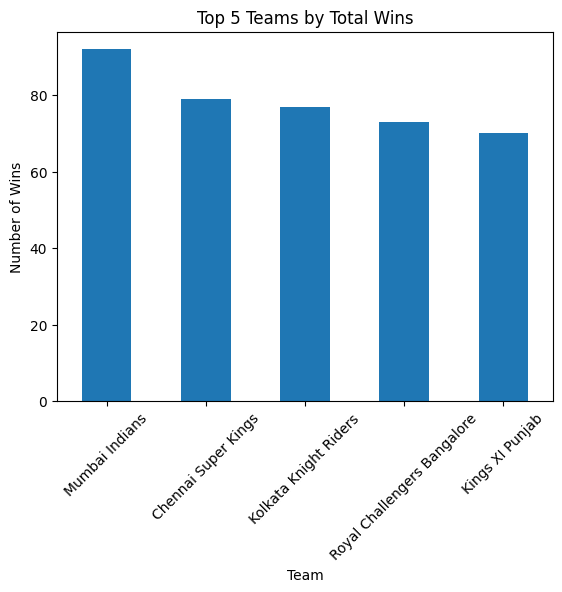

In [13]:
wins = matches['winner'].value_counts()

plt.figure()
wins.head(5).plot(kind='bar')
plt.title("Top 5 Teams by Total Wins")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()


### Insight

Mumbai Indians have the highest total wins across 10 seasons, followed closely by Chennai Super Kings. This indicates long-term dominance and consistency in performance.


## Win Percentage Analysis


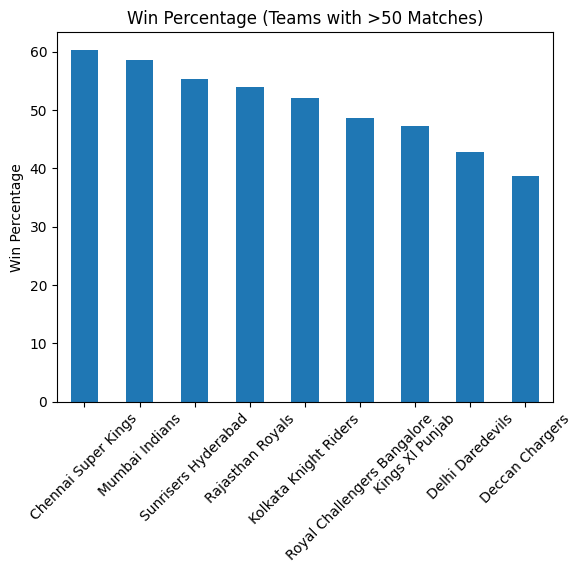

In [14]:
# Total matches played by each team
matches_played = pd.concat([matches['team1'], matches['team2']]).value_counts()

# Total wins
wins = matches['winner'].value_counts()

# Win percentage
win_percentage = (wins / matches_played) * 100

# Filter teams with more than 50 matches (to remove small sample teams)
valid_teams = matches_played[matches_played > 50].index
filtered_win_percentage = win_percentage[valid_teams].sort_values(ascending=False)

plt.figure()
filtered_win_percentage.plot(kind='bar')
plt.title("Win Percentage (Teams with >50 Matches)")
plt.ylabel("Win Percentage")
plt.xticks(rotation=45)
plt.show()


### Insight

Although Mumbai Indians have the highest total wins, Chennai Super Kings have the highest win percentage among teams with more than 50 matches. This shows that CSK has been the most consistent and efficient team across seasons.


## Toss Impact Analysis



In [15]:
toss_win = matches[matches['toss_winner'] == matches['winner']]

toss_win_percentage = (len(toss_win) / len(matches)) * 100

toss_win_percentage


51.342812006319114

### Insight

Toss winners win approximately 51% of matches, indicating that the toss has minimal influence on match outcomes. Team performance matters more than toss advantage.


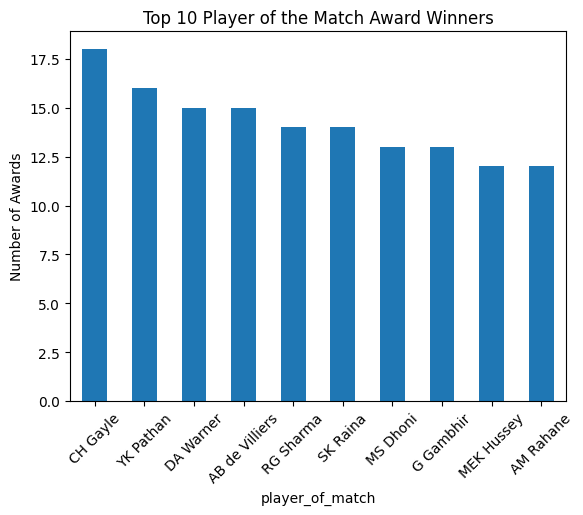

In [16]:
top_players = matches['player_of_match'].value_counts().head(10)

plt.figure()
top_players.plot(kind='bar')
plt.title("Top 10 Player of the Match Award Winners")
plt.ylabel("Number of Awards")
plt.xticks(rotation=45)
plt.show()


# Conclusion

- Mumbai Indians have the highest total wins.
- Chennai Super Kings have the highest win percentage among major teams.
- Toss has a moderate influence on match outcome.
- **Chris Gayle** has won the most Player of the Match awards.
- Overall, Chennai Super Kings and Mumbai Indians are the most consistent franchises across 10 seasons.
